# Julia で Fresnel積分

In [1]:
using PyCall
using PyPlot

Fresnelの余弦積分，Fresnelの正弦積分をそれぞれ次で定義する:
$$C(x)=\int_{0}^{x} \cos\left(\frac{\pi}{2}t^2\right)dt , \quad S(x)=\int_{0}^{x} \sin\left(\frac{\pi}{2}t^2\right)dt.$$
このとき
$$C(x)+iS(x)=\int_{0}^{x} e^{i\pi t^2/2}dt$$
となる．
[2] では $0\leq x<2$のとき次のように計算している:

$$
C(x)=\sum_{k=0}^{N} \frac{(-1)^k}{(2k+1)!(4k+1)}\left(\frac{\pi}{2}\right)^{2k}x^{4k+1},\quad
S(x)=\sum_{k=0}^{N} \frac{(-1)^k}{(2k+1)!(4k+3)}\left(\frac{\pi}{2}\right)^{2k+1}x^{4k+3}.
$$

また，$x\geq 2$ の時に次の式を用いて計算している：
$$\int_{0}^{x} e^{i\pi t^2/2}dt=\frac{1+i}{2}-\frac{i}{\pi x} e^{i\pi x^2/2}H(z).$$
ここで$z=i/\pi x^2$ であり $H(z)$ は連分数で定まる次の形をしている関数である．
$$H(z)=\frac{1}{1+\frac{z}{1+\frac{2z}{1+\frac{3z}{1+...}}}}$$

# 実装

In [2]:
function series_expansion(x)
    N=100 
    c=x
    s=(pi/2)*x^3/3
    cx=c
    sx=s
    for k in 1:N
        ck=-(4k-3)/2k/(2k-1)/(4k+1)*(pi/2)^2*x^4*c
        cx+=ck
        sk=-(4k-1)/2k/(2k+1)/(4k+3)*(pi/2)^2*x^4*s
        sx+=sk
        c=ck;s=sk
    end 
    return cx,sx
end


series_expansion (generic function with 1 method)

In [3]:
function H(z::Number; n::Integer=100)
    cf::typeof(inv(z))=1
    for k in n:-1:1
        cf = 1+k*z/cf
    end
    return inv(cf)
end

function continued_fraction(x)
    z=im/pi/x/x
    cxis=(1+im)/2-im/pi/x*exp(im*pi*x^2/2)H(z)
    cx=real(cxis); sx=imag(cxis)
    return cx,sx
end 

continued_fraction (generic function with 1 method)

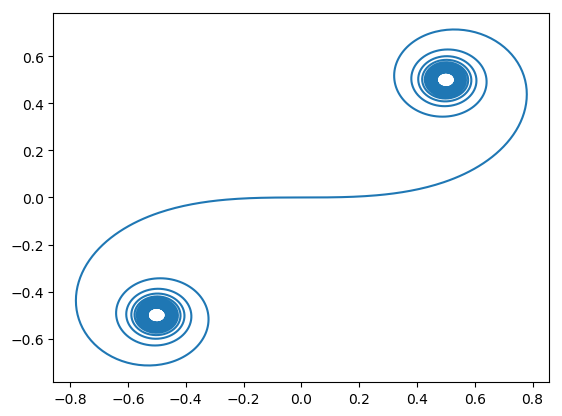

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000004542AAC8>

In [4]:
function fresnel(x)
    cx,sx=0.0,0.0

    if x==0 
        return 0,0
    end 
    
    xa=abs(x)
    if xa<2
        cx,sx=series_expansion(xa)
    elseif xa>=2
        cx,sx=continued_fraction(xa)
    end 

    if x<0
        cx,sx=-cx,-sx 
    end 
    return cx,sx 
end 

function main()
    n=1000
    h=0.01
    cxs,sxs=[],[]
    for i in -n:n 
        x=i*h 
        cx,sx=fresnel(x)
        #println(x,",",cx,",",sx)
        push!(cxs,cx)
        push!(sxs,sx)
    end
    plot(cxs,sxs)
end 


main()


In [5]:
using BenchmarkTools


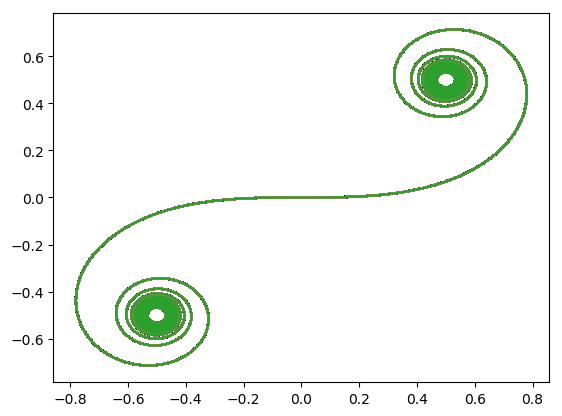

BenchmarkTools.Trial: 
  memory estimate:  417.19 KiB
  allocs estimate:  17289
  --------------
  minimum time:     12.593 ms (0.00% GC)
  median time:      13.136 ms (0.00% GC)
  mean time:        13.699 ms (2.28% GC)
  maximum time:     45.399 ms (42.99% GC)
  --------------
  samples:          365
  evals/sample:     1

In [6]:
@benchmark main()

# Reference:
- [1] :https://twitter.com/genkuroki/status/898008651033489408
- [2] :田口俊弘著 Fortan ハンドブック 270頁 Key Element6.1 連分数の計算方法 技術評論社より
- [3] :http://www.aip.de/groups/soe/local/numres/bookcpdf/c6-9.pdf